In [2]:
#Importing important libraries
import numpy as np 
import pandas as pd 
import os
from sklearn.metrics import classification_report 
import seaborn as sns 
sns.set(font_scale=1.4)
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf 
from tqdm import tqdm 

# Preparing the dataset

In [3]:
#Load the dataset
input_dir='C:/Users/rishi/MTC ML Project/Intel Image Classification/archive (10)/seg_train/seg_train'
image_details=[]

In [4]:
# Iterate through the classes (subdirectories)
for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)
    
    # Iterate through images in the class subdirectory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        
        # Load the image
        image = cv2.imread(image_path)
        
        # Check if the image is loaded properly
        if image is not None:
            height, width, channels = image.shape
            image_type = image.dtype
            resolution = (height, width)
            
            # Append image details to the list
            image_details.append({
                'image_name': image_name,
                'class': class_name,
                'height': height,
                'width': width,
                'channels': channels,
                'type': image_type,
                'resolution': resolution,
                'path': image_path
            })
# Create a DataFrame from the image details
image_df = pd.DataFrame(image_details)

# Save the DataFrame to a CSV file
image_df.to_csv('image_details.csv', index=False)


# Detailed Analysis

In [5]:
# Detailed exploratory analysis
print("Number of images:", len(image_df))
print("Image classes:", image_df['class'].unique())
print("Average image resolution:", image_df[['height', 'width']].mean())
print("Image types:", image_df['type'].unique())

Number of images: 14034
Image classes: ['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Average image resolution: height    149.908722
width     150.000000
dtype: float64
Image types: [dtype('uint8')]


In [6]:
# Class-specific analysis
for class_name in image_df['class'].unique():
    class_df = image_df[image_df['class'] == class_name]
    print(f"\nClass: {class_name}")
    print(f"Number of images: {len(class_df)}")
    print(f"Average height: {class_df['height'].mean()}")
    print(f"Average width: {class_df['width'].mean()}")
    print(f"Height variance: {np.var(class_df['height'])}")
    print(f"Width variance: {np.var(class_df['width'])}")


Class: buildings
Number of images: 2191
Average height: 149.9881332724783
Average width: 150.0
Height variance: 0.30839409634160503
Width variance: 0.0

Class: forest
Number of images: 2271
Average height: 149.89476001761338
Average width: 150.0
Height variance: 3.6001090463274683
Width variance: 0.0

Class: glacier
Number of images: 2404
Average height: 149.78535773710482
Average width: 150.0
Height variance: 9.09619159415435
Width variance: 0.0

Class: mountain
Number of images: 2512
Average height: 149.8638535031847
Average width: 150.0
Height variance: 5.125572411659682
Width variance: 0.0

Class: sea
Number of images: 2274
Average height: 149.94678979771328
Average width: 150.0
Height variance: 1.8472126497463321
Width variance: 0.0

Class: street
Number of images: 2382
Average height: 149.98446683459278
Average width: 150.0
Height variance: 0.5744858408396011
Width variance: 0.0


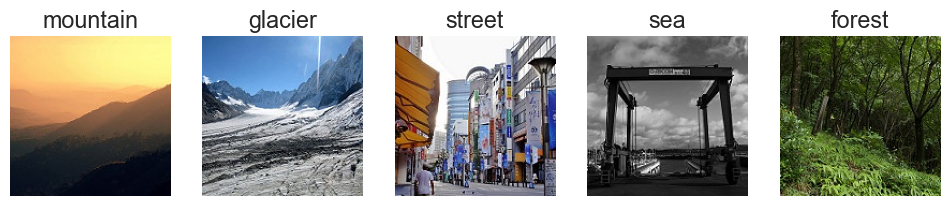

In [7]:
class_counts = image_df['class'].value_counts()

plt.figure(figsize=(12, 8))
# Iterate through the first few classes and display an example image from each
for i, (class_name, count) in enumerate(class_counts.items()):
    if i >= 5:  # Display only the first 5 classes
        break
    # Get the path to an example image from the current class
    example_image_path = os.path.join(input_dir, class_name, os.listdir(os.path.join(input_dir, class_name))[0])
    # Load the image using cv2
    example_image = cv2.imread(example_image_path)
    # Convert the image from BGR to RGB (cv2 loads images in BGR format)
    example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)
    # Display the image using matplotlib
    plt.subplot(1, 5, i+1)
    plt.imshow(example_image)
    plt.title(class_name)
    plt.axis('off')
plt.show()

# Preprocessing the dataset

In [8]:
from skimage import feature 

def preprocess_image(image_path, output_path, size=(224, 224)):
    """
    Preprocess a single image by resizing, normalizing, and converting to grayscale."""
    # Load the image from the given path
    img = cv2.imread(image_path)
    if img is None:
        return  # If image can't be loaded, exit the function

    # Resize the image to the given size
    img_resized = cv2.resize(img, size, interpolation=cv2.INTER_AREA)

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Normalize the pixel values to range between 0 and 1
    img_normalized = img_gray / 255.0

    # Save the preprocessed image
    cv2.imwrite(output_path, (img_normalized * 255).astype(np.uint8))

In [9]:
def preprocess_dataset(input_dir, output_dir, size=(224, 224)):
    """
    Preprocess all images in the dataset directory.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # List of class names (directories) in the dataset
    classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea','street']

    for class_name in classes:
        input_class_dir = os.path.join(input_dir, class_name)
        output_class_dir = os.path.join(output_dir, class_name)
        
        if not os.path.exists(output_class_dir):
            os.makedirs(output_class_dir)
        
        if not os.path.exists(input_class_dir):
            print(f"Directory {input_class_dir} does not exist, skipping.")
            continue
        
        # Iterate over each image file in the class directory
        for img_name in tqdm(os.listdir(input_class_dir), desc=f'Processing {class_name}'):
            input_img_path = os.path.join(input_class_dir, img_name)
            output_img_path = os.path.join(output_class_dir, img_name)
            preprocess_image(input_img_path, output_img_path, size)

In [10]:
if __name__ == '__main__':
    # Set the input and output directory paths
    input_dir = r'C:\Users\rishi\MTC ML Project\Intel Image Classification\archive (10)\seg_train\seg_train'
    output_dir = r'C:\Users\rishi\MTC ML Project\Intel Image Classification\archive (10)\preprocessed_dataset'
    
    # Preprocess the dataset
    preprocess_dataset(input_dir, output_dir) # type: ignore

Processing street: 100%|██████████| 2382/2382 [00:06<00:00, 391.73it/s]


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Preparing the training and testing dataset

In [12]:
# Define the base directory
base_dir = r'C:\Users\rishi\MTC ML Project\Intel Image Classification\archive (10)\preprocessed_dataset'

# Define the classes
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Create augmented data generators (for training and testing)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Load images from directories
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\rishi\MTC ML Project\Intel Image Classification\archive (10)\seg_test\seg_test',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Model Selection and Analysis

In [14]:
# Define the CNN model with Dropout for regularization
model = Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),  # Add Dropout for regularization
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Another Dropout layer
    Dense(len(classes), activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Data Augmentation: Introduced data augmentation with ImageDataGenerator for training data (e.g., shearing, zooming, flipping). This artificially increases training data size and helps prevent overfitting.
Dropout Layers: Increased the number and slightly reduced the Dropout rates (0.2 and 0.5) to further prevent the model from memorizing specific training examples.
Early Stopping: Added an EarlyStopping callback (commented out) to monitor validation loss and stop training if it doesn't improve for a certain number of epochs (requires validation data).

In [6]:
# Early stopping to prevent overfitting (optional)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model with steps_per_epoch and potentially early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,  # Use validation data for early_stopping.
    callbacks=[early_stopping]  # Add early stopping to avoid overfitting
)

Epoch 1/20


C:\Users\rishi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


701/701 ━━━━━━━━━━━━━━━━━━━━ 832s 1s/step - accuracy: 0.4273 - loss: 1.5647 - val_accuracy: 0.6433 - val_loss: 0.9251
Epoch 2/20
  1/701 ━━━━━━━━━━━━━━━━━━━━ 8:59 770ms/step - accuracy: 0.8000 - loss: 0.7174

C:\Users\rishi\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


701/701 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8000 - loss: 0.7174 - val_accuracy: 0.6453 - val_loss: 0.9091
Epoch 3/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 785s 1s/step - accuracy: 0.6601 - loss: 0.8948 - val_accuracy: 0.7237 - val_loss: 0.7345
Epoch 4/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.7000 - loss: 0.6446 - val_accuracy: 0.7220 - val_loss: 0.7431
Epoch 5/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 794s 1s/step - accuracy: 0.7206 - loss: 0.7415 - val_accuracy: 0.6313 - val_loss: 0.9853
Epoch 6/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.6000 - loss: 1.0328 - val_accuracy: 0.6110 - val_loss: 1.0481
Epoch 7/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 777s 1s/step - accuracy: 0.7555 - loss: 0.6799 - val_accuracy: 0.7370 - val_loss: 0.7182
Epoch 8/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.7500 - loss: 0.7049 - val_accuracy: 0.7523 - val_loss: 0.6760
Epoch 9/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 723s 1s/step - accuracy: 0.7722 - loss: 0.6218 - val_accuracy: 0

# Model Accuracy

In [7]:
train_evaluation = model.evaluate(train_generator)
print(f"Training Loss: {train_evaluation[0]}")
print(f"Training Accuracy: {train_evaluation[1]}")

702/702 ━━━━━━━━━━━━━━━━━━━━ 256s 365ms/step - accuracy: 0.8476 - loss: 0.4223
Training Loss: 0.4133884906768799
Training Accuracy: 0.8498646020889282


In [8]:
# Evaluate the model
test_evaluation = model.evaluate(test_generator)
print(f"Test Loss: {test_evaluation[0]}")
print(f"Test Accuracy: {test_evaluation[1]}")


150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - accuracy: 0.8191 - loss: 0.5134
Test Loss: 0.5310220718383789
Test Accuracy: 0.8133333325386047


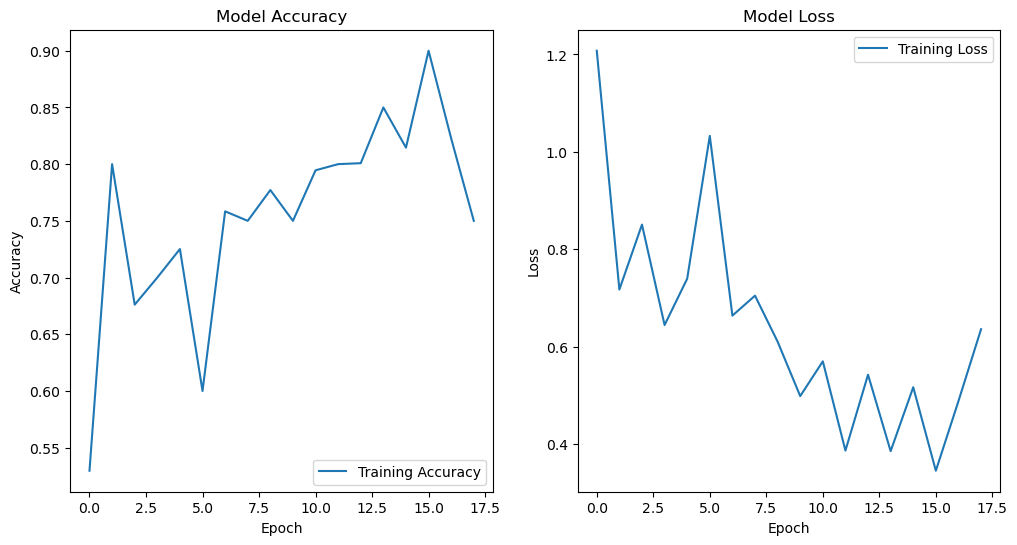

In [9]:
#Visualizing the training and testing accuracy.
# Plot training accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [13]:
# Save the model in the recommended Keras format
model.save('intel_image_cnn_model.keras') 
print("Model saved to intel_image_cnn_model.keras")

Model saved to intel_image_cnn_model.keras


# Visualization and Validation 

In [ ]:
#Just run this cell for the output tkinter window.
import tkinter as tk
from tkinter import ttk, filedialog
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np

# Load the trained CNN model
model = tf.keras.models.load_model('intel_image_cnn_model.keras')

# Define class labels
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Function to preprocess the image for the CNN model
def preprocess_input_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img = np.array(img) / 255.0
    return img

# Function to handle image upload and perform classification
def upload_and_process_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Display uploaded image
        img = Image.open(file_path)
        img_resized = img.resize((400, 400))
        img_tk = ImageTk.PhotoImage(img_resized)
        image_label.config(image=img_tk)
        image_label.image = img_tk

        # Process image with the model
        process_image(file_path)

# Function to process image and classify it
def process_image(image_path):
    # Preprocess the input image
    input_image = preprocess_input_image(image_path)
    input_image_batch = np.expand_dims(input_image, axis=0)
    
    # Predict the class of the image using the CNN model
    predictions = model.predict(input_image_batch)
    class_idx = np.argmax(predictions, axis=1)[0]
    class_confidence = predictions[0, class_idx]
    predicted_class = classes[class_idx]
    
    # Update the classification result
    classification_result.config(text=f'Classification: {predicted_class} (Confidence: {class_confidence:.2f})')

# Set up Tkinter window
window = tk.Tk()
window.title("Image Classification")
window.geometry("800x600")
window.configure(bg='#4169e1')  # Royal blue background

# Set up styles
style = ttk.Style()
style.configure('TFrame', background='#4169e1')
style.configure('TLabel', background='#4169e1', foreground='#ffffff', font=('Helvetica', 14))  # White text
style.configure('TButton', background='#4169e1', foreground='#4169e1', font=('Helvetica', 14), padding=10)  # Royal blue button with royal blue text
style.map('TButton', background=[('active', '#1976d2')], foreground=[('active', '#ffffff')])

# Add heading
heading = ttk.Label(window, text="Image Classification", font=("Helvetica", 24, 'bold'), background='#4169e1', foreground='#ffffff')
heading.pack(pady=20)

# Add upload button
upload_btn = ttk.Button(window, text="Upload Image", command=upload_and_process_image)
upload_btn.pack(pady=20)

# Add frame for image and results
frame = ttk.Frame(window)
frame.pack(pady=20)

# Add label to display the uploaded image
image_label = ttk.Label(frame)
image_label.grid(row=0, column=0, rowspan=3, padx=20)

# Add label to display classification result
classification_result = ttk.Label(frame, text="Classification: ")
classification_result.grid(row=0, column=1, sticky='nw')

# Run the Tkinter event loop
window.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


# Output

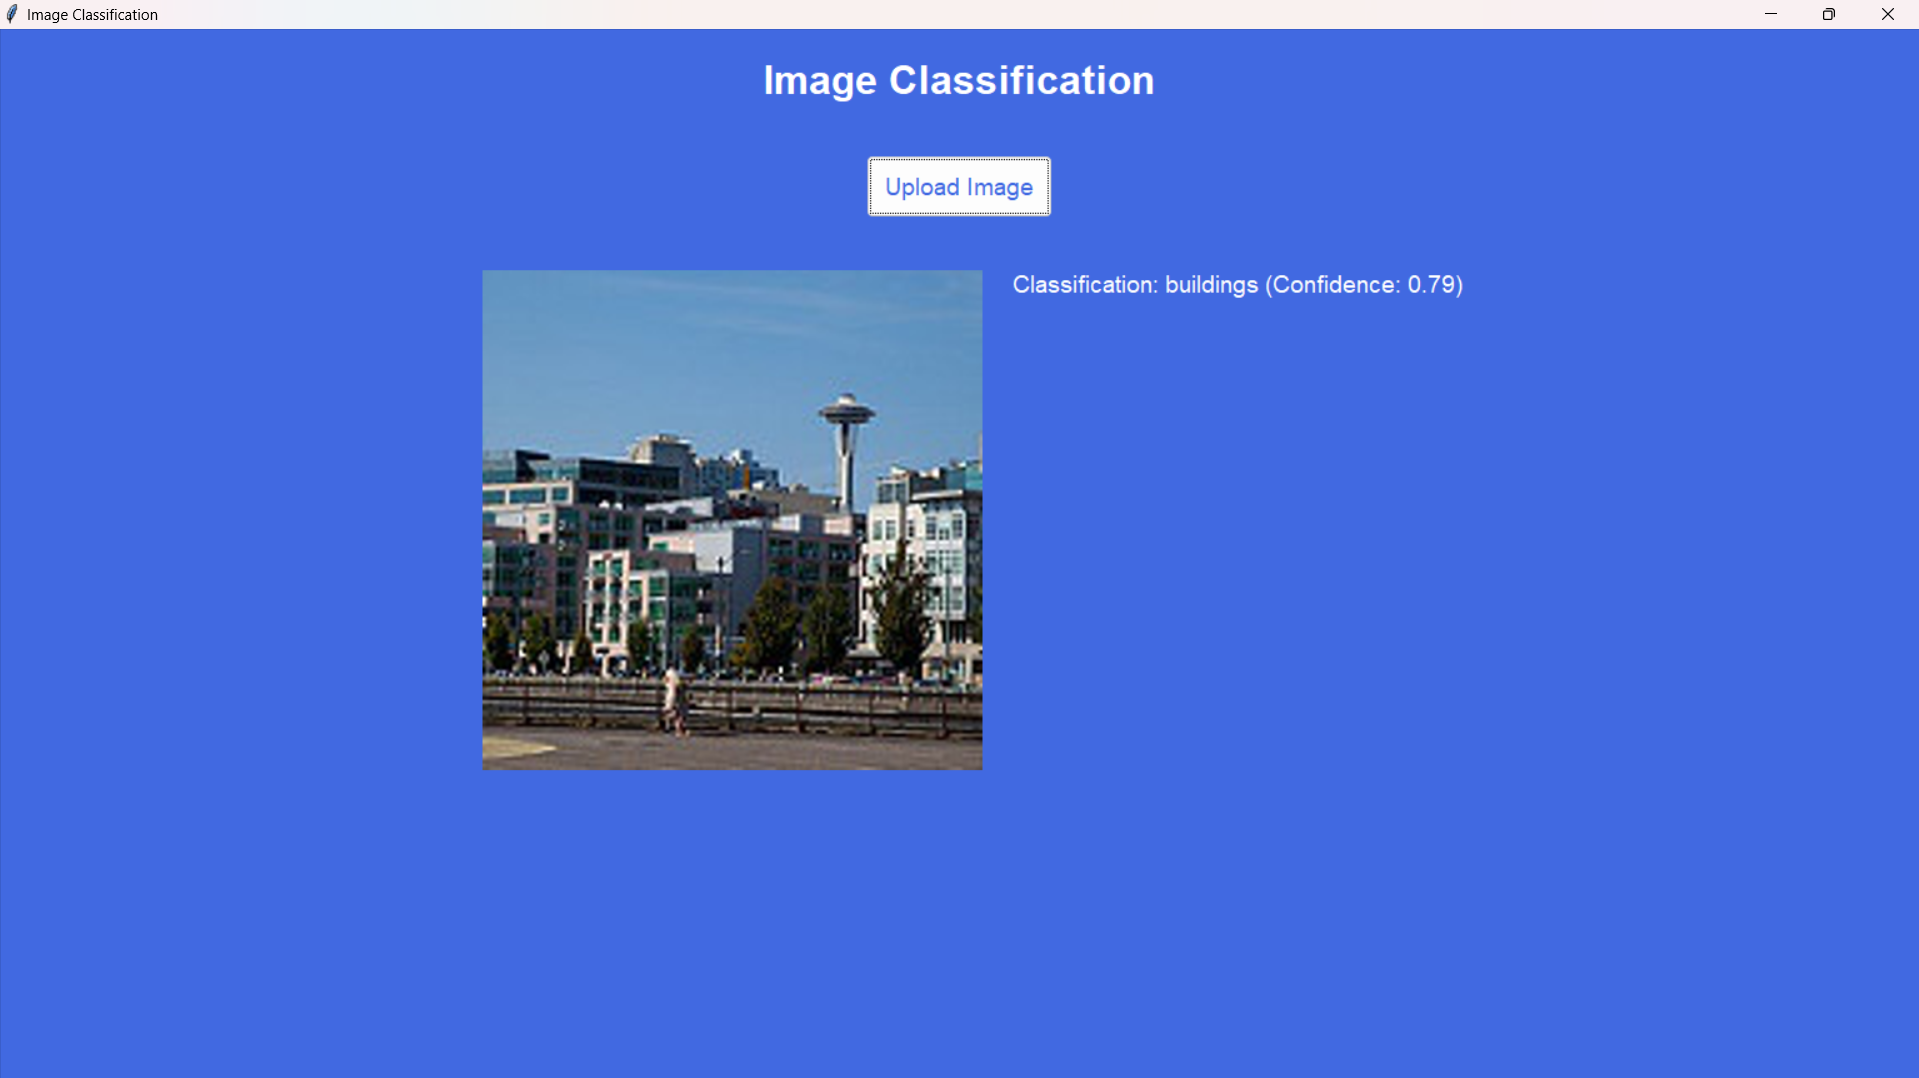

In [27]:
from IPython.display import Image
Image(filename='result1.png') 

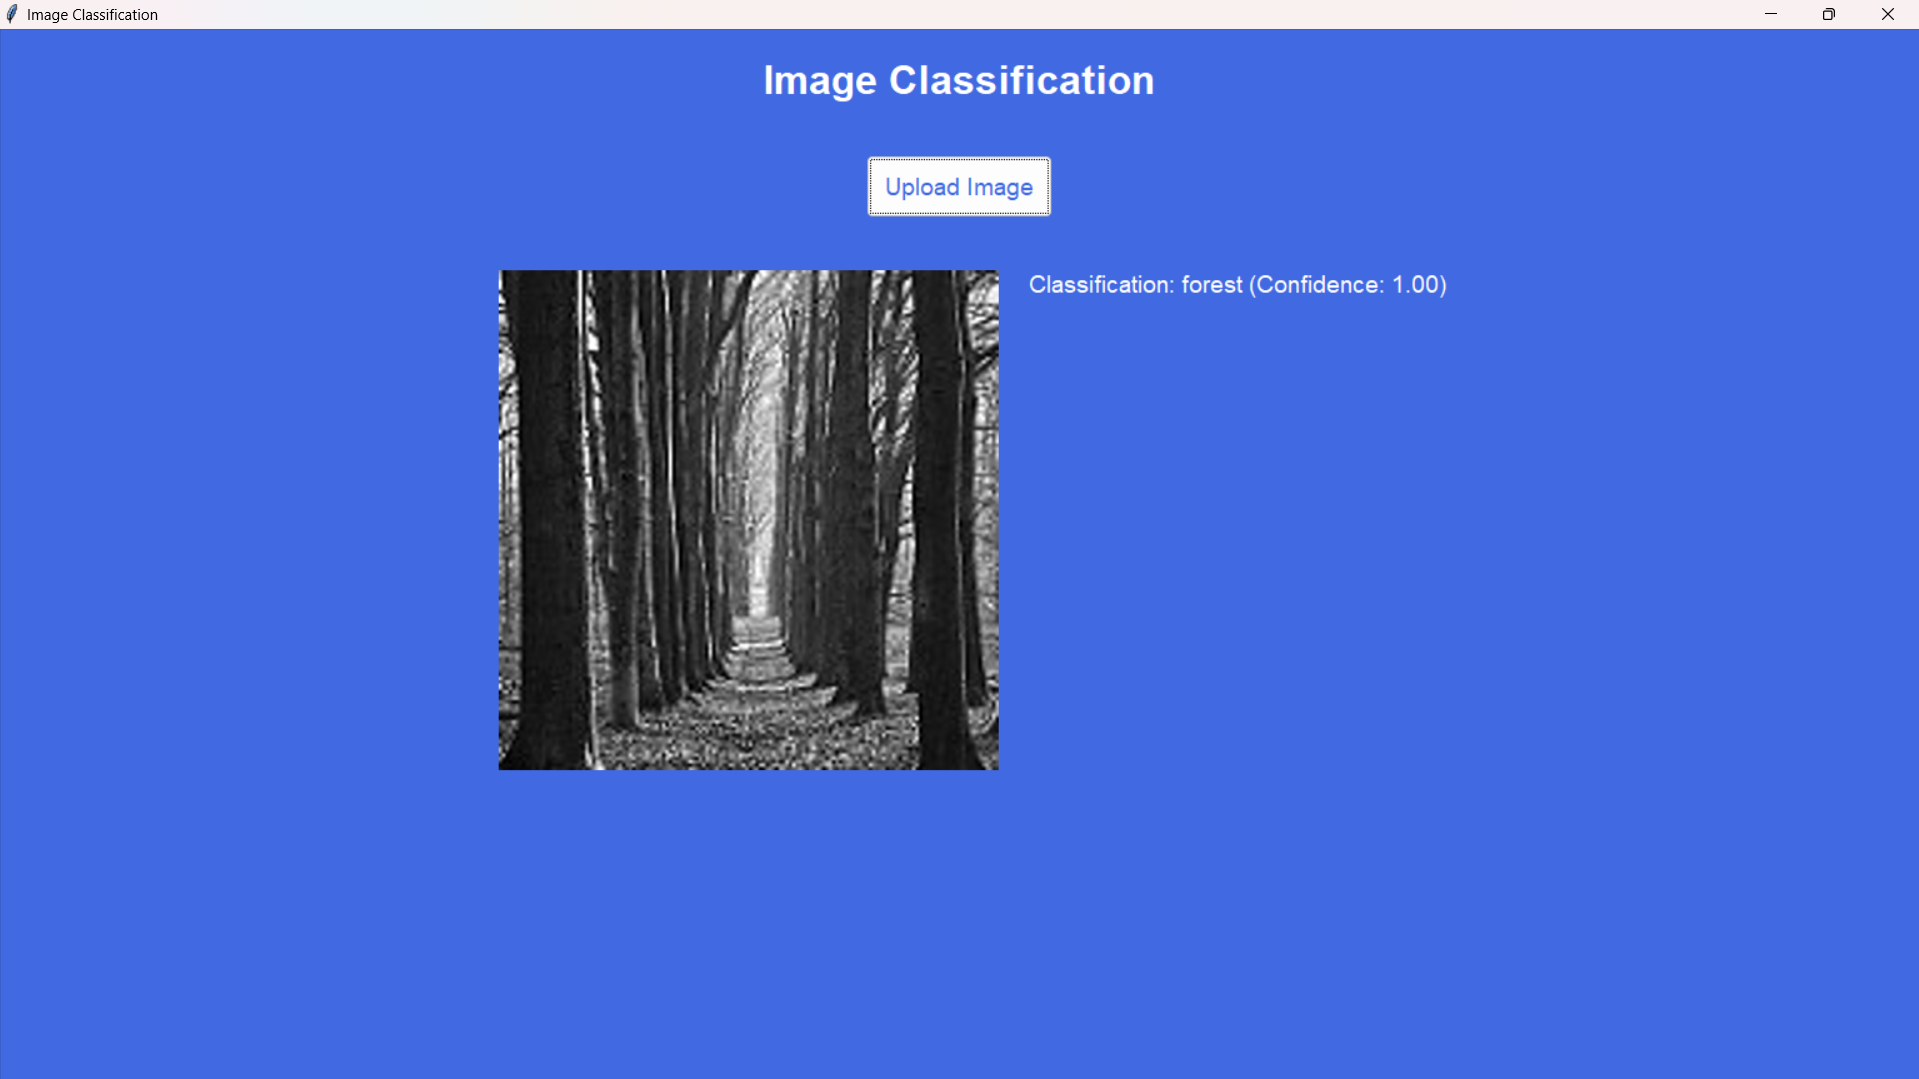

In [28]:
Image(filename='result2.png') 

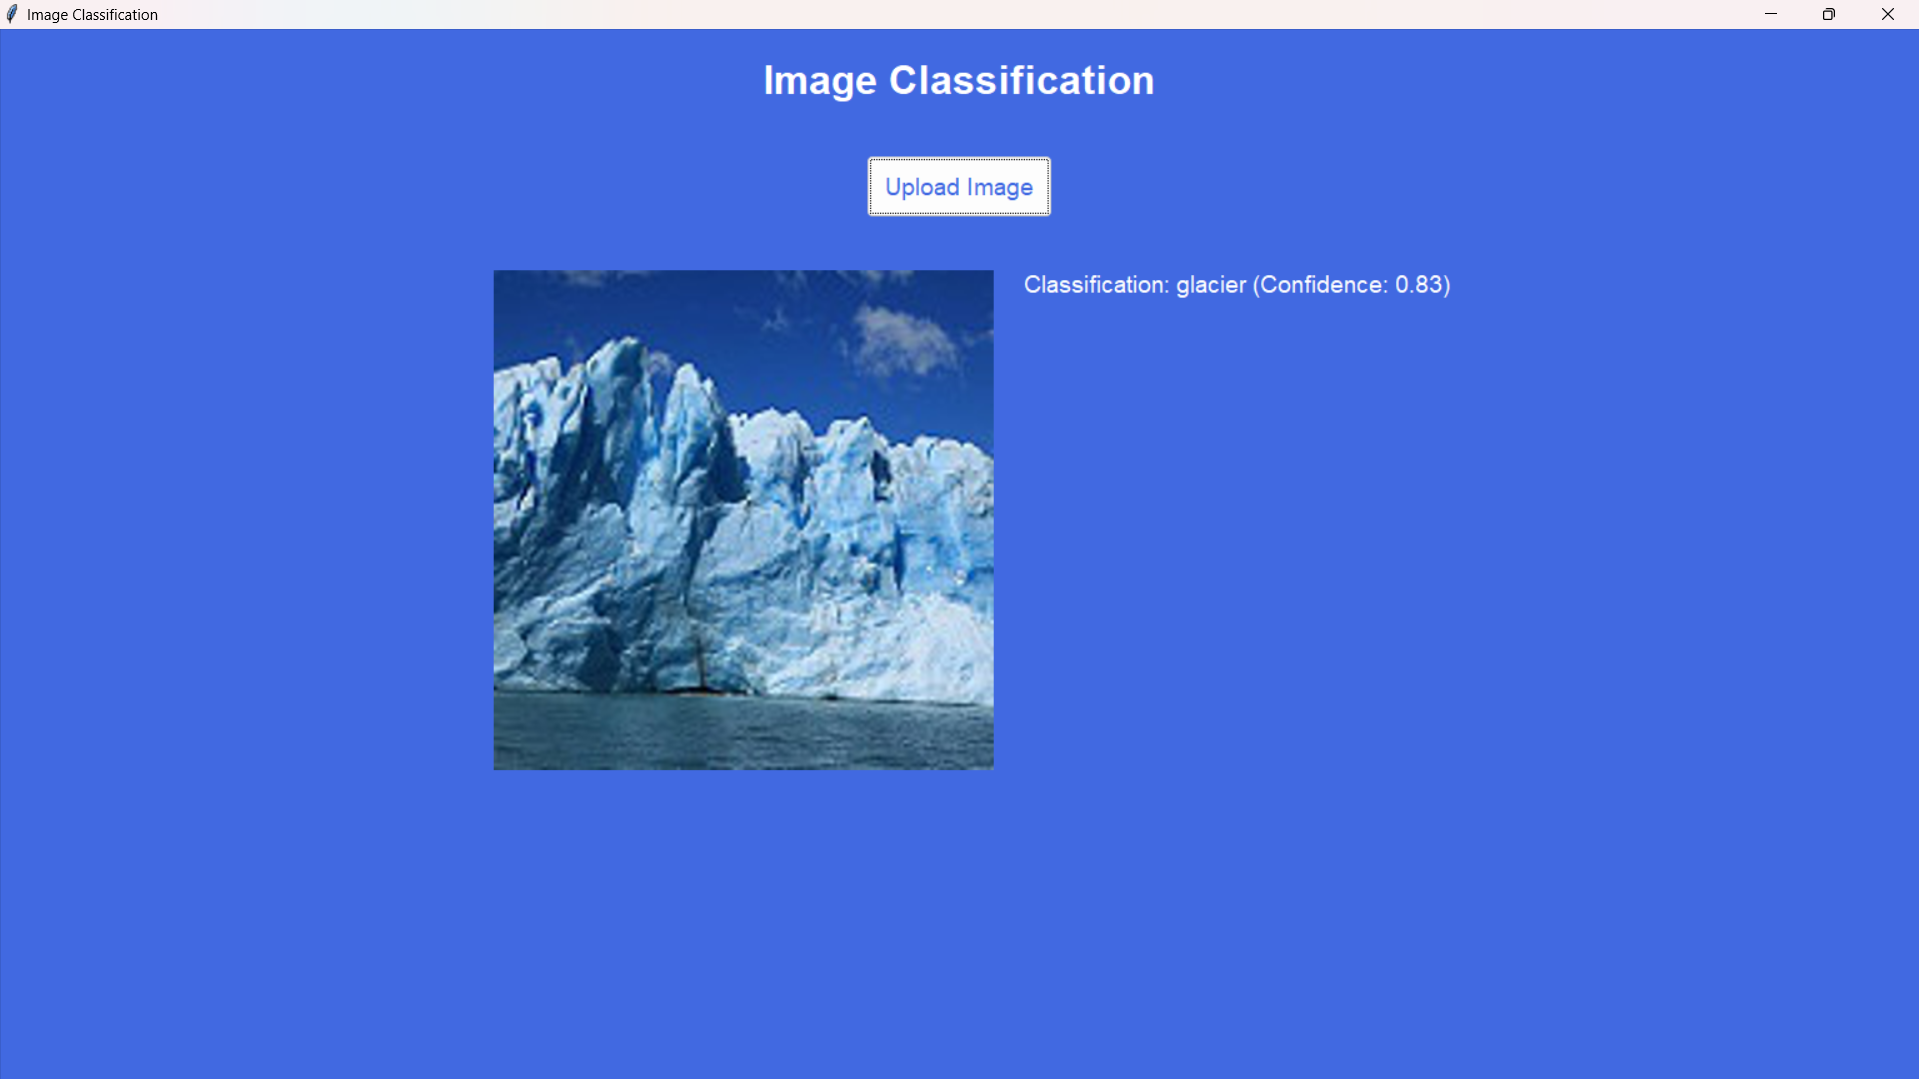

In [29]:
Image(filename='result3.png') 

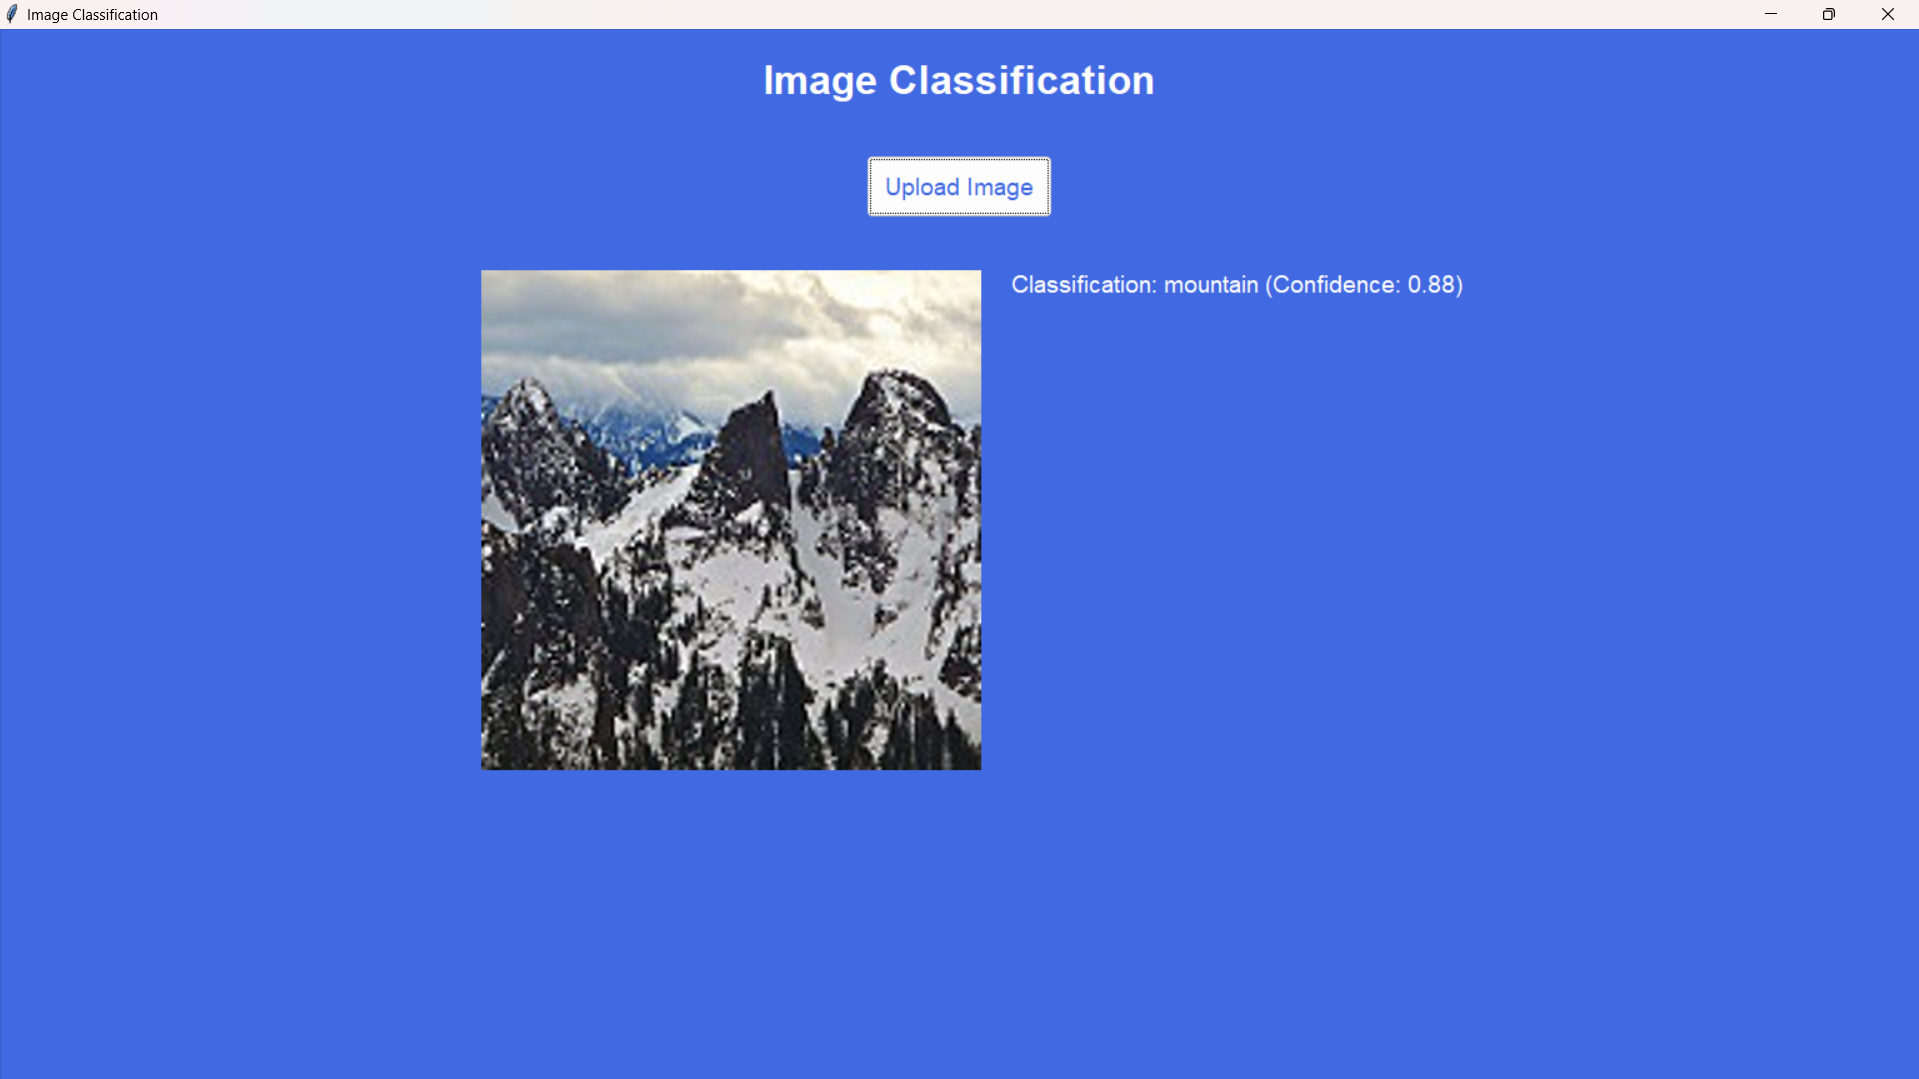

In [30]:
Image(filename='result4.png') 

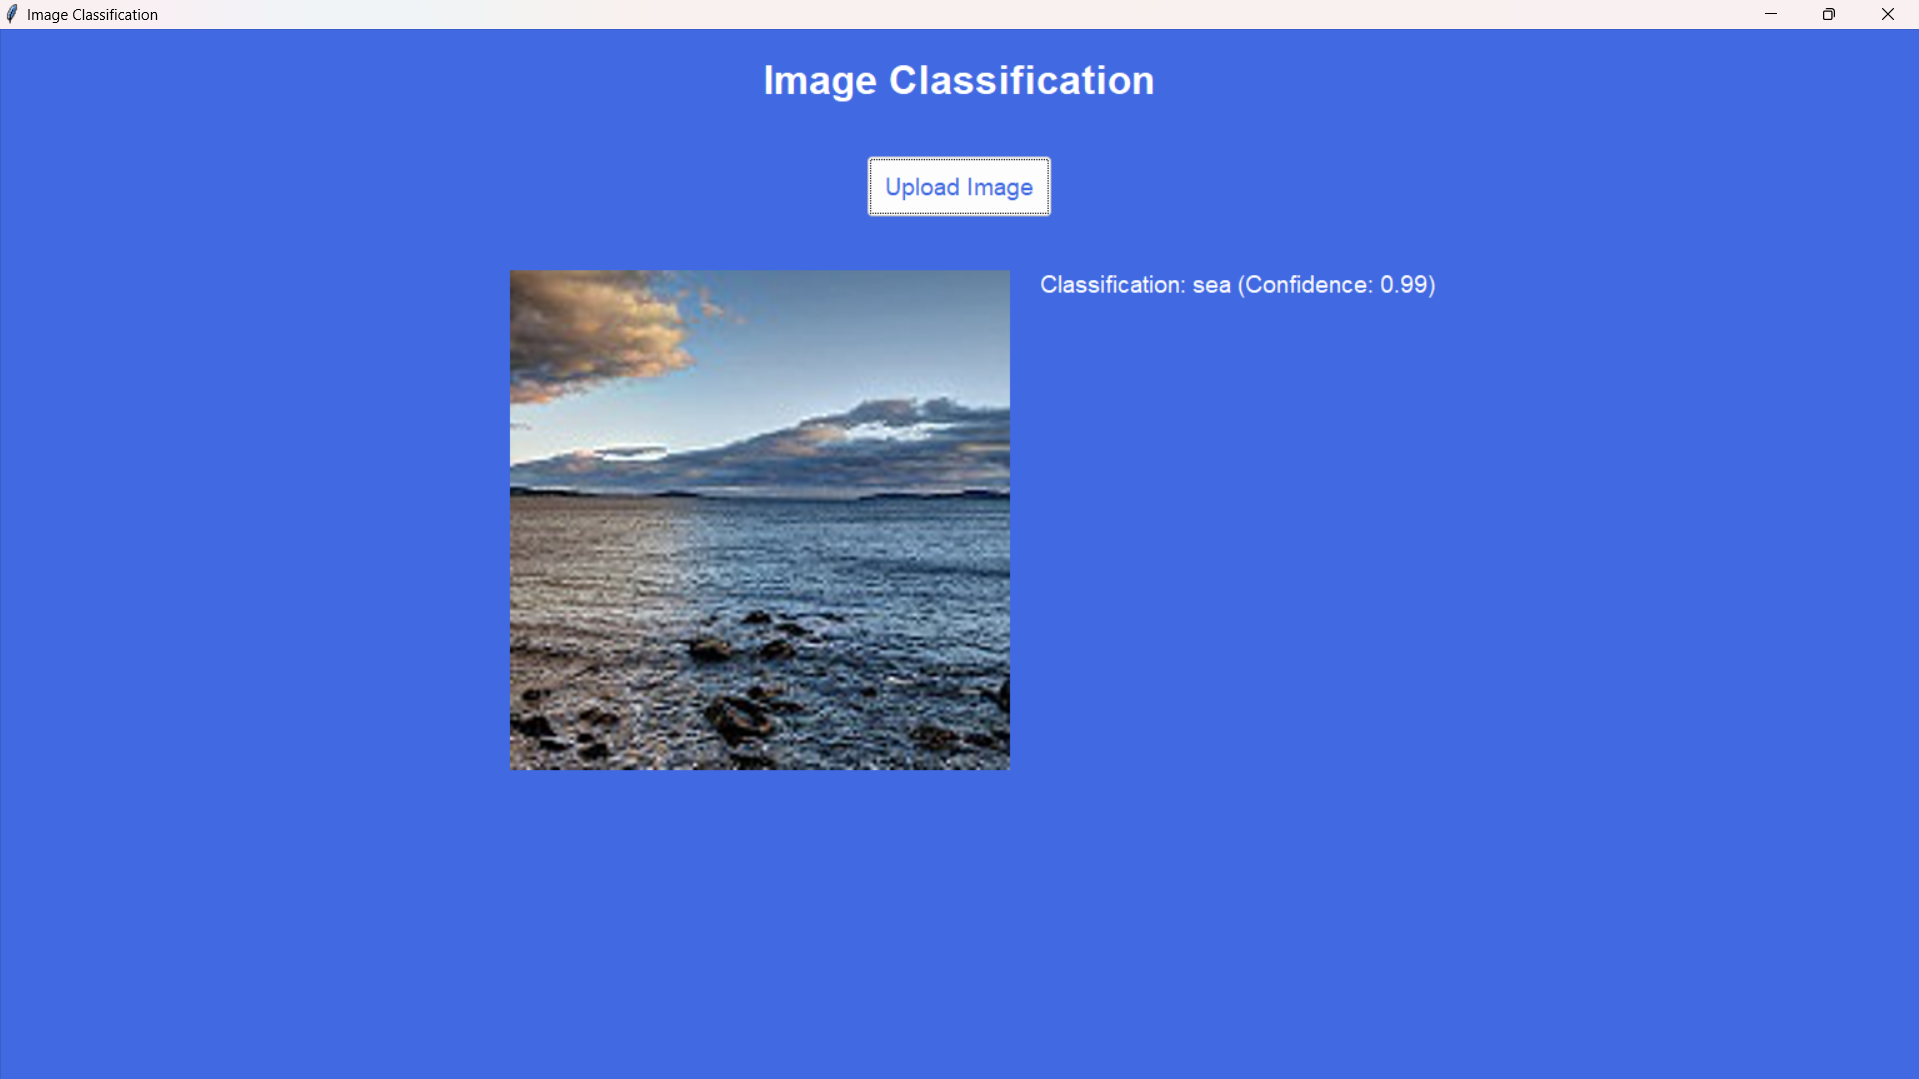

In [31]:
Image(filename='result5.png') 

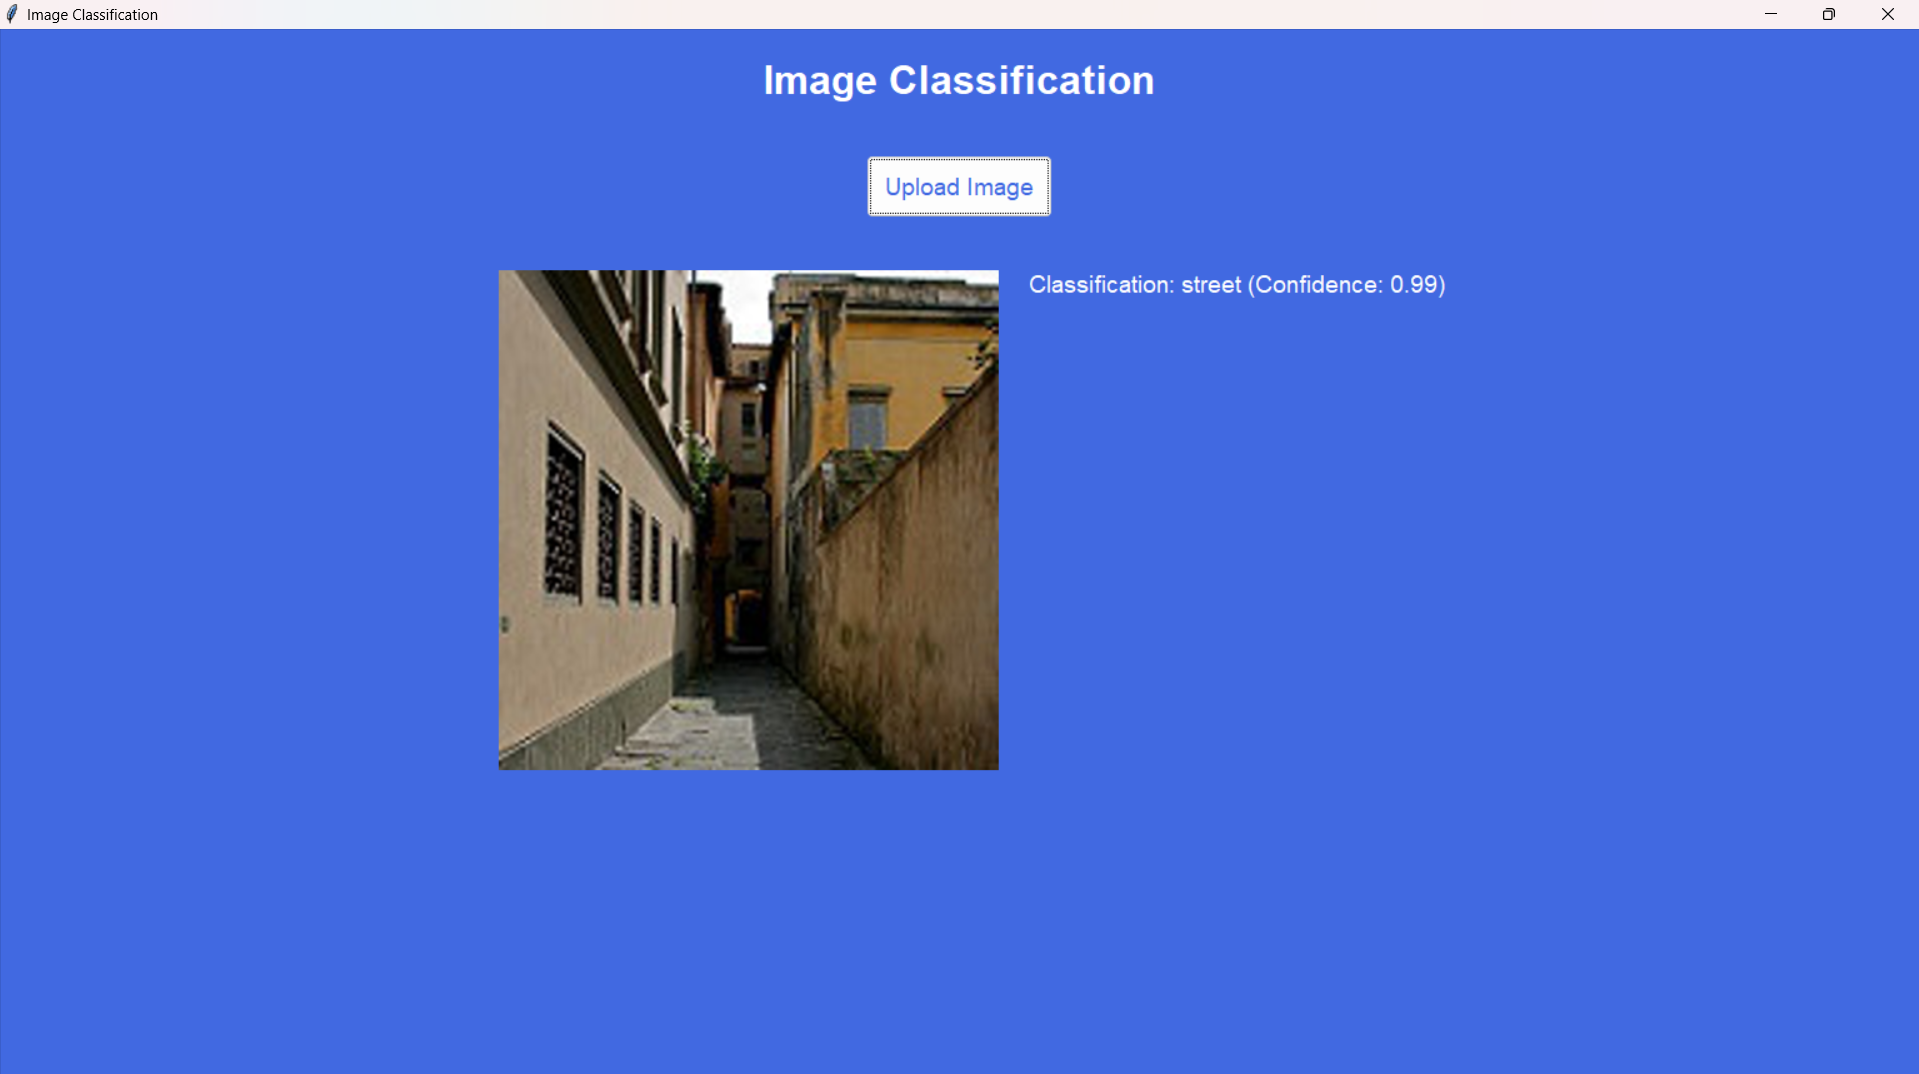

In [32]:
Image(filename='result6.png') 